In [68]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup

### Open html file in read mode

In [39]:
with open('ajio.html', 'r', encoding='utf-8') as f:
    html = f.read()

'<html lang="en"><head>\n      <meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\n      <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n      <meta name="format-detection" content="telephone=no">\n      <meta charset="utf-8">\n      <meta name="google-site-verification" content="mst3EDdpHbIKH409fDtfXk-wS6DAbcyLv-BXDg55gfo">\n      <meta http-equiv="Cache-control" content="no-transform">\n      <meta name="viewport" content="width=device-width, initial-scale=1.0, user-scalable=yes">\n      <meta name="author" content="">\n        \n        <meta name="og:type" content="website">\n        <meta name="og:site_name" content="Ajio.com">\n        <meta name="fb:app_id" content="233163173739076">\n        <meta name="twitter:card" content="summary">\n        <meta name="twitter:site" content="@AJIOLife">\n        \n        \n          <meta name="description" content="Buy Backpacks for Men. Huge collection of men\'s backpacks at low offer price &amp; discount
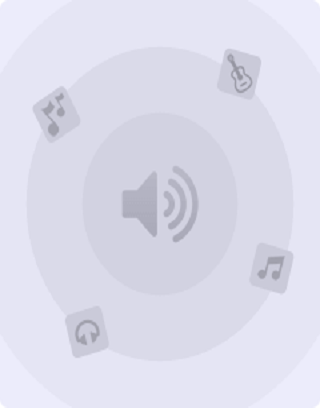

In [40]:
html

In [45]:
soup = BeautifulSoup(html, 'html.parser')

'<html lang="en">\n <head>\n  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>\n  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>\n  <meta content="telephone=no" name="format-detection"/>\n  <meta charset="utf-8"/>\n  <meta content="mst3EDdpHbIKH409fDtfXk-wS6DAbcyLv-BXDg55gfo" name="google-site-verification"/>\n  <meta content="no-transform" http-equiv="Cache-control"/>\n  <meta content="width=device-width, initial-scale=1.0, user-scalable=yes" name="viewport"/>\n  <meta content="" name="author"/>\n  <meta content="website" name="og:type"/>\n  <meta content="Ajio.com" name="og:site_name"/>\n  <meta content="233163173739076" name="fb:app_id"/>\n  <meta content="summary" name="twitter:card"/>\n  <meta content="@AJIOLife" name="twitter:site"/>\n  <meta content="Buy Backpacks for Men. Huge collection of men\'s backpacks at low offer price &amp; discounts at COD, Easy Returns &amp; Exchanges. Order Now." name="description"/>\n  <meta content="Buy Backpack
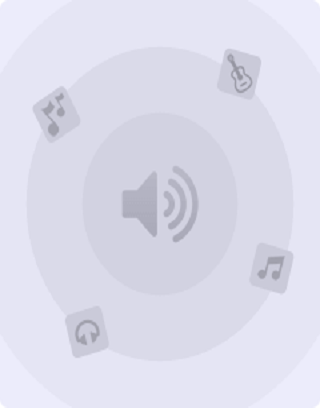

In [46]:
soup.prettify()

In [47]:
containers = soup.find_all('div', {'class':'item rilrtl-products-list__item item'})

In [53]:
for i in containers :
    print(i.find_all('div',{'class':'brand'}))
    print(i.find_all('div',{'class':'nameCls'}))
    print(i.find_all('div',{'class':'_2mae- _2K_kI _2rhfx yqqmX'}))
    break
    

[<div aria-label="FUR JADEN" class="brand"><strong>FUR JADEN</strong></div>]
[<div aria-label="Backpack with Adjustable Shoulder Strap" class="nameCls">Backpack with Adjustable Shoulder Strap</div>]
[<div class="_2mae- _2K_kI _2rhfx yqqmX"><div class="_1gIWf"><p aria-label="4.3" class="_3I65V">4.3</p><div class="_1kWBm"><img alt="Star icon" class="sLl6B" src="https://assets.ajio.com/static/img/white-star-display.svg"/></div></div><p aria-label="| 139" class="">|   139</p></div>]


### Checking for one product

In [38]:
soup = BeautifulSoup(html, 'html.parser')

brand = item_div.find('div', class_='brand').text.strip()

# Find the main div containing the product details
item_div = soup.find('div', class_='item rilrtl-products-list__item item')

# Extract the name
name = item_div.find('div', class_='nameCls').text.strip()

# Extract the price
price = item_div.find('span', class_='price').strong.text.strip()

# Extract the offer price
offer_price = item_div.find('div', class_='offer-div').find('span', class_='offer-pricess').text.strip()

# Print the extracted values
print ('brand', brand)
print('Name:', name)
print('Price:', price)
print('Offer Price:', offer_price)

brand FUR JADEN
Name: Backpack with Adjustable Shoulder Strap
Price: ₹1,800
Offer Price: ₹1,582


### Creating list for brand, rating, review, price

In [64]:
import numpy as np
soup = BeautifulSoup(html, 'html.parser')

containers = soup.find_all('div', class_='item rilrtl-products-list__item item')
brand = []
ratings = []
review = []
price_ = []
for i in containers:
    # Extract brand name
    brand_div = i.find('div', {'class': 'brand'})
    brand_name = brand_div.text.strip() if brand_div else np.nan
    # print('Brand:', brand_name)
    brand.append(brand_name)
    
    rating_div = i.find('div', {'class': '_2mae- _2K_kI _2rhfx yqqmX'})
    if rating_div:
        rating = rating_div.find('p', {'class': '_3I65V'}).text.strip() if rating_div.find('p', {'class': '_3I65V'}) else None
        reviews = rating_div.find('p', {'class': ''}).text.strip() if rating_div.find('p', {'class': ''}) else None
    else:
        rating = np.nan
        reviews = np.nan
    # print('Rating:', rating)
    ratings.append(rating)
    # print('Number of Reviews:', reviews)
    review.append(reviews)

    price_span = i.find('span', {'class': 'price'})
    price = price_span.strong.text.strip() if price_span else np.nan

    offer_div = i.find('div', {'class': 'offer-div'})
    offer_price = offer_div.find('span', {'class': 'offer-pricess'}).text.strip() if offer_div else np.nan
    # print('Price:', price)
    price_.append(price)   

### Creating Dataframe

In [66]:
import pandas as pd
df = pd.DataFrame({
    'brand_name': brand,
    'rating' : rating,
    'reviews' : review,
    'price' : price
    
})
df

brand_name  rating  reviews   price
0           FUR JADEN     NaN  |   139  ₹3,299
1     ARMANI EXCHANGE     NaN    |   4  ₹3,299
2           FUR JADEN     NaN  |   264  ₹3,299
3     ARMANI EXCHANGE     NaN   |   30  ₹3,299
4                Puma     NaN      NaN  ₹3,299
...               ...     ...      ...     ...
1979           YOUSTA     NaN      NaN  ₹3,299
1980             Puma     NaN      NaN  ₹3,299
1981             Puma     NaN      NaN  ₹3,299
1982             Puma     NaN      NaN  ₹3,299
1983             Puma     NaN      NaN  ₹3,299

[1984 rows x 4 columns]

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   brand_name  1983 non-null   object 
 1   rating      0 non-null      float64
 2   reviews     723 non-null    object 
 3   price       1984 non-null   object 
dtypes: float64(1), object(3)
memory usage: 62.1+ KB
